# Tutorial: Coding a Variational AutoEncoder in Tensorflow


The Variational AutoEncoder network is a network architecture that aims to compress a high dimensional input vector to a vector in a lower dimensional space (encoding). In order to do so the network compresses and decompresses the input during the learning process.

![Center](images/vae_arch.png)

 We call the input of the network $X$ and the output $X'$. The train the network to obtain the optimal compression, i.e. when the difference between the input $X$ and the decompressed output $X'$ is minimum. 






***
Let's first import some useful libraries, and define the Leaky_ReLU function:

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def lrelu(X, alpha=0.1):
    return tf.maximum(alpha*X, X)


***
Let's also import the training set

In [10]:
mnist = tf.keras.datasets.mnist
(X_train, _), (X_test, _) = mnist.load_data()

and draw a sample


 Sample: 



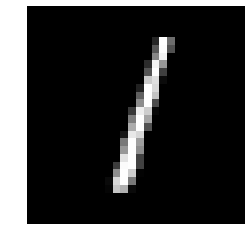

In [11]:
sample = 2 #chose one sample in the training set

X_train = X_train.astype(np.float32).reshape(-1,28*28)/X_train.max()
X_test = X_test.astype(np.float32).reshape(-1,28*28)/X_train.max()

print('\n Sample: \n')
plt.imshow(X_test[sample].reshape(28,28), cmap='gray');
plt.axis('off');


## 1) Layer class definition

This class provides the definition of a dense layer. A dense layer is characterized by its trainable weights:

- a matrix W of dimensions (m_input, m_output)
- a bias vector b of dimensions (m_output)

The Layer class possesses the ```forward``` method which performs the linear forward propagation:

$$
Z_{out}= X_{in} \times W(m_{in},m_{out})+b(m_{out})
$$

Code along with us and follow the provided instructions:

In [12]:
class Layer(object):
    
    def __init__(self, mi, mo, name):
        
        """
        This is the init method of the class Layer:
        It defines the class itself and contains the
        definition of the parameters that will be used by
        the other class' methods (i.e. forward)
        
        """
        # we are creating a dense layer, it's trainable parameters
        # are the matrix W of dimensions (mi, mo) and the biases
        # vectors that has dimension (mo)
        
        self.W = tf.get_variable(name='W_'+name,        # this name identifies uniquely the matrix W
                                 shape=(mi, mo),           # this assigns to the matrix the needed shape
                                 initializer=tf.glorot_uniform_initializer()) # you can choose among
                                                                              # many different distributions
                                                                              # to initialize your weights with
        
        self.b = tf.get_variable(name='b_'+name,        # this name identifies uniquely the bias vector b 
                                 shape=(mo,),              
                                 initializer=tf.zeros_initializer(),) # biases can be initialized as zeros
        
    def forward(self, X):
        
        """
        This is the forward propagation method of the class Layer
        """
        # the method forward performs the following forward propagation 
        # operation on the input tensor X. Don't worry about back  
        # propagation, tensorflow will handle it
        
        Z=tf.matmul(X,self.W)+self.b
        
        return Z
        
        

## 2) Creating the AutoEncoder Network

We will build the AutoEncoder as a class possessing several methods:

```
class AutoEncoder():

    def __init__():
    
    def build_network():
    
    def decode():
    
    def encode():
    
    def fit():
    
```

Code along with us and follow the provided instructions 


In [17]:
class AutoEncoder(object):
    
    def __init__(self, input_dim, layer_dims, 
                learning_rate, epochs, batch_size):
        
        # Note: all of what has self in front of it will be reused outside the init method!
        #       thus we make promote some constants to attributes of the class
                
        """
        The AutoEncoder (AE) class is initialized by providing the number of features of the 
        input (in this case 28*28) and a list of integers named layers_dims.
        It contains the number of the nodes for the intermediate layers and is of the kind:
        
        layer_dims= [
                     output_nodes_layer_1,
                     output_nodes_layer_2,
                     output_nodes_layer_3,
                     ...
                     output_nodes_layer_n
                     ]
                     
        """
        # Write code here
        self.layer_dims = layer_dims 
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.latent_dims = layer_dims[-1]
        """
        
        The AE architecture has a butterfly shape and thus we reverse the previous 
        list of shapes to obtain:
        
        reversed_layer_dims = [
                               output_nodes_layer_(n-1),
                               output_nodes_layer_(n-2),
                               ...
                               output_nodes_layer_2,
                               output_nodes_layer_1,
                               ]
        """
        # Write code here
        self.reversed_layer_dims= list(reversed(layer_dims)) #Note: We exclude layer n
        
        """
        
        Now we define the placeholder for our input tensor X_in, and create 2 empty lists
        named encoder_layers and decoder_layers that will contain the layers of our AE
        
        """
        
        #Write code here
        self.X_in = tf.placeholder(tf.float32, shape=(None, input_dim))
        
        self.encoder_layers = []
        self.decoder_layers = []
        
        
        """
        
        We miss one last ingredient to build our AE: a method that builds the network ,
        it will be called build_network
        
        
        """
        # Write code here
        self.build_network(input_dim)
        
    
    """
    Let's define what this build network method does:
    
    """
    #Write code here
    def build_network(self, input_dim):
        
        """
        STEP 1: BUILDING THE NETWORK
        
        the method build_network creates the graph that represents the network. It 
        does this by making use of two for loops, the first defines the encoder layers
        """
        
        """
        ENCODER LAYERS
        """
        # Write code here
        mi = input_dim    #input size
        count=0           #set a counter for layers' names
        
        for mo in self.layer_dims[:-1]:           # loop over a list [mo_1, mo_2, ..., mo_(n-1), mo_n]
                                             # of intermediate layer dimensions
            
            layer = Layer(mi, mo, str(count))     # for each intermediate layer dimension create a layer
                                             # named 'count' with associated weights of shape W(mi, mo) b(mo)
                
            self.encoder_layers.append(layer)# add the created layer to the list of encoder layers
            count+=1                         # and increase the counter
            mi = mo                          # the input dimension mi of the next layer will be the ouput
                                             # dimension of the previous one

        self.encoder_layer_mu = Layer(mi, self.latent_dims, 'encoder_mu')
        self.encoder_layer_si = Layer(mi, self.latent_dims, 'encoder_si')
        
        #Note: in this way the class is created independently of the size of the network! the actual
        #      list of layer dimensions is given later!
            
        """
        DECODER LAYERS
        """
        # We repeat the same operations, but in reverse order to create the right hand-side of the butterfly
        # the decoder
        
        #Write code here
        mi = self.latent_dims
        for mo in self.reversed_layer_dims:   # loop over a list [mo_(n-1), mo_(n-2), ..., mo_2, mo_1]  
            
            layer = Layer(mi, mo, str(count))      # create the layer here
            
            self.decoder_layers.append(layer) # append the layer to the decoder layers list
            count+=1                          # increase the counter and
            mi = mo                           # update the output dimensions
            
        # Note that the last mo is not the input size, so, to compare
        # the input of the network with the ouput 
        
        output_layer = Layer(mi,input_dim, str(count))  # we'll have to create one last layer
                                                    # of dimensions (mi, input_dim):
        self.decoder_layers.append(output_layer)    # and append it to the list of decoder layers
        
    
        """
        
        STEP 2: BUILDING THE GRAPH
        
        Now that the network has been built, we want to 
        define how the input will propagate through the encoder and the decoder.
        
        The overall forward propagation of each side of the network is
        the propagation through each single layer and is carried out by the
        "encode" and "decode" functions:
        
        """
    
        self.Z, encoded_mu, encoded_log_si = self.encode(self.X_in) # Propagation of the input through the encoder. 
                                        # This outputs the latent vector self.Z
            
        self.X_hat = self.decode(self.Z)    # Propagation of the latent vector self.Z
                                        # through the decoder, last output is unactivated 
                                        # on purpose (will be clearer later)
        
        
        """
        
        STEP 3: DEFINING THE LOSS and THE OPTIMIZATION ALGORITHM
        
        With the two last steps we created the network and the graph of operations
        that propagate the input until the network output X_hat. Now we have to define
        The loss function, i.e. that positive number, function of the network
        parameters that has to be minimized during training.
        
        """
        
        """
        LOSS
        """
        
        # write code here
        encoder_kl = -0.5 * tf.reduce_mean(1 + 2*tf.log(encoded_log_si) - tf.square(encoded_mu) - tf.square(encoded_log_si))
        consistency_loss = tf.reduce_sum(tf.square(self.X_in - self.X_hat))
        
        self.loss = encoder_kl + consistency_loss
        # reduce_sum converts a tensor to a scalar sum of its components
                    
        """
        
        OPTIMIZATION ALGORITHM
        
        Define the loss minimization algorithm, we chose Adaptive momentum optimizer (Adam) for 
        this purpose. Everytime train_op will be called, one step of gradient minimization will
        be taken.
        """
        # write code here
        self.train_op = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.loss)
                                                #set the learning rate                #what to minimize
        
    """
    We now define the last two functions: encode and decode which we used previously
    in STEP 2 
    """
    # write code here
    def encode(self, X):                                # This method takes as input a sample X
                                                        # and outputs its encoded form Z
        
        output=X
        
        for layer in self.encoder_layers:          # This loop propagates the input X
                                                        # through the encoder layers using
            output = layer.forward(output)              # their forward method
            output = lrelu(output)

        mu = self.encoder_layer_mu.forward(output)
        log_sigma = tf.nn.softplus(self.encoder_layer_si.forward(output))
        eps = tf.random_normal(shape=tf.shape(self.latent_dims),
                              mean=0.,stddev=1.)
        
        output = mu + tf.multiply(tf.exp(log_sigma), eps)
        
        return output, mu, log_sigma                    # vector in latent space, Z
        
    def decode(self,Z):                                 # This method takes a vector Z in the 
                                                        # latent space and decodes it to X_hat
                                                        # living in the space of the samples
        output=Z
        
        for layer in self.decoder_layers:               # Loop through the decoder network,  

            output = layer.forward(output)
            output = tf.nn.sigmoid(output)
            
        return output
    
    
    def fit(self, X, show_fig=True):                    # Fit method of the class AutoEncoder
         
        losses = []                                     # a list containing the losses
        n_batches = len(X) // self.batch_size
        
        print("Training AutoEncoder")
        print("n_batches:", n_batches)
        for i in range(self.epochs):
            
            print("epoch:", i)
            np.random.shuffle(X)
        
            for j in range(n_batches):                  # the training cycle in one epoch:
            
                X_batch = X[j*self.batch_size:(j+1)*self.batch_size] # the batch to pass for computation
                _, l, = self.session.run((self.train_op, self.loss), 
                                         feed_dict={self.X_in: X_batch}) #running one step of gradient
                l /= self.batch_size                                     #minimization

                losses.append(l)
                
                # let's add some intermediate printouts to see how the training is going
                if j % 80*self.batch_size == 0:        

                    print("iter: %d, cost: %.3f" % (j, l))
            
        if show_fig:
            plt.plot(losses)
            plt.show()


    def predict(self, X):                              # function to test the network once training
                                                       # is completed
        
        return self.session.run(self.X_hat, feed_dict={self.X_in: X})
    
    def generate_sample(self):
        
        z = np.random.normal(size=(1,self.latent_dims))
        
        one_sample=self.session.run(self.X_hat, feed_dict={self.Z:z})

        return one_sample
    
    def generate_sample_from_input(self, z):
        
        
        one_sample=self.session.run(self.X_hat, feed_dict={self.Z:z})

        return one_sample
   
    def set_session(self, session):
        
        self.session = session
        

## 3) Test the AutoEncoder

Now that the AutoEncoder class is defined, we create our own AutoEncoder and test how it works. As usual follow our coding and use the provided instructions

In [18]:
_, input_dimensions = X_train.shape     # Lets get the input_dimensions from the dataset
tf.reset_default_graph()                # Resetting any previously defined graph

"""
Create the AutoEncoder object

dae = AutoEncoder() 

with aruguments it


"""
#write code here                
dae = AutoEncoder(input_dim=input_dimensions, # Create your very own network here!!
                  
                  layer_dims=[500,300,100,2],   # Play with the layers' list, it will 
                                              # automatically define the intermediate
                                              # layers.
                  learning_rate=0.001,       # Set some values for the learning rate
                  epochs=15, batch_size=100)  # the epochs and the batch_size



init_op=tf.global_variables_initializer() # Define the network's variables initializer

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.10)

with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options )) as sess: #Create a tensorflow session
    
    sess.run(init_op)     # Initialize the network variables in this sess
    dae.set_session(sess) # Set it for the AutoEncoder you defined previously
    
    dae.fit(X_train)      # Call the fit method that you defined previously
    

    # Testing the created network performances on the test set!
    done = True
    while not done:
        i = np.random.choice(len(X_test))         # pick a random sample of the test set
        x = X_test[i]                             
        y = dae.predict([x]).reshape(28, 28)      # propagate it through the network

        plt.subplot(1,2,1)                        # Plot the original and the reconstructed
        plt.imshow(x.reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.subplot(1,2,2)
        plt.imshow(y, cmap='gray')
        plt.title("Reconstruction")
        plt.show()

        ans = input("Generate another?")          # Stop the while loop with 'n' or 'N'
        if ans and ans[0] in ('n' or 'N'):
              done = True
                
    done = False
    while not done:
                       
        y = dae.generate_sample();     # propagate it through the network

        plt.imshow(y.reshape(28, 28), cmap='gray');
        plt.title("Reconstruction")
        plt.show()

        ans = input("Generate another?")          # Stop the while loop with 'n' or 'N'
        if ans and ans[0] in ('n' or 'N'):
              done = True
                
    n = 10 #number of images per side
    x_values = np.linspace(-3,3,n)
    y_values = np.linspace(-3,3,n)
    
    image = np.empty((28*n,28*n))
    
    Z=[]
    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):
            z=[x, y]
            Z.append(z)
        
    X_recon = dae.generate_sample_from_input(Z)
    
    k = 0
    for i, x in enumerate(x_values):
        for j, y in enumerate(y_values):  
            x_recon = X_recon[k]
            k+=1
        
            x_recon=x_recon.reshape(28,28)
            image[(n - i - 1) * 28:(n - i) * 28, j * 28:(j + 1) * 28] = x_recon
    plt.imshow(image,cmap='gray')
    fig = plt.gcf()
    fig.set_size_inches(10,10)
    #fig.show()
    #plt.show()

ValueError: Dimensions must be equal, but are 784 and 2 for 'Normal/log_prob/standardize/sub' (op: 'Sub') with input shapes: [?,784], [?,2].